Instructions for updating:
non-resource variables are not supported in the long term


Початок навчання...
Епоха 2000: Loss=25.2167, k=1.8457, b=1.1260
Епоха 4000: Loss=18.4604, k=1.9149, b=1.0912
Епоха 6000: Loss=26.1478, k=1.9189, b=1.0909
Епоха 8000: Loss=21.6031, k=1.9277, b=1.0890
Епоха 10000: Loss=22.9510, k=1.9270, b=1.0850
Епоха 12000: Loss=24.8777, k=1.9260, b=1.0843
Епоха 14000: Loss=22.4868, k=1.9345, b=1.0841
Епоха 16000: Loss=23.8677, k=1.9270, b=1.0811
Епоха 18000: Loss=20.8170, k=1.9223, b=1.0920
Епоха 20000: Loss=28.7157, k=1.9205, b=1.0833

Навчання завершено!
Фінальні параметри: k = 1.9205 (очікувалось 2), b = 1.0833 (очікувалось 1)


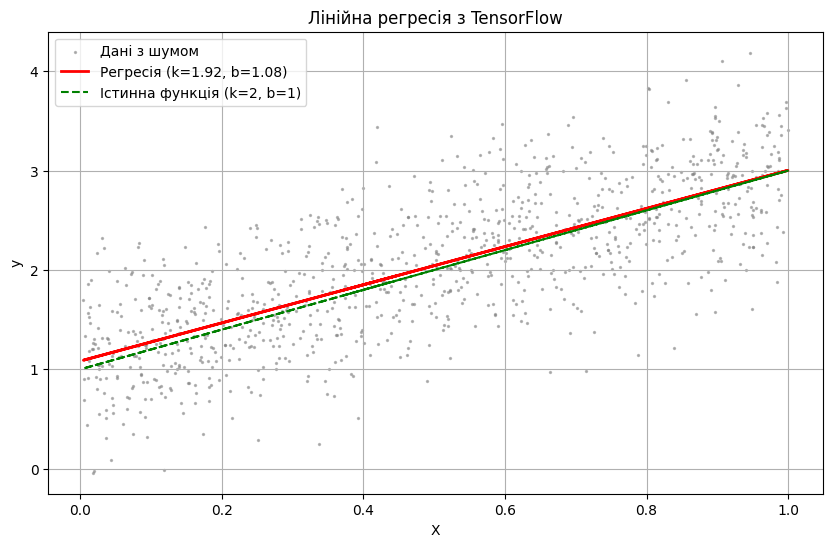

In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

true_k = 2
true_b = 1
num_samples = 1000

np.random.seed(42)
X_data = np.random.rand(num_samples)
noise = np.random.normal(loc=0.0, scale=0.5, size=num_samples)
y_data = true_k * X_data + true_b + noise


X = tf.placeholder(tf.float32, shape=[None], name="X_input")
y = tf.placeholder(tf.float32, shape=[None], name="y_target")

k = tf.Variable(tf.random_normal([]), name="slope")
b = tf.Variable(0.0, name="bias")

y_pred = k * X + b

loss = tf.reduce_sum(tf.square(y - y_pred))

learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


batch_size = 100
epochs = 20000
loss_history = []

init = tf.global_variables_initializer()

print("Початок навчання...")

with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        rand_indices = np.random.choice(num_samples, batch_size)
        x_batch = X_data[rand_indices]
        y_batch = y_data[rand_indices]

        _, current_loss, current_k, current_b = sess.run(
            [optimizer, loss, k, b],
            feed_dict={X: x_batch, y: y_batch}
        )

        loss_history.append(current_loss)

        if (i + 1) % 2000 == 0:
            print(f"Епоха {i+1}: Loss={current_loss:.4f}, k={current_k:.4f}, b={current_b:.4f}")

    final_k, final_b = sess.run([k, b])

print("\nНавчання завершено!")
print(f"Фінальні параметри: k = {final_k:.4f} (очікувалось 2), b = {final_b:.4f} (очікувалось 1)")

plt.figure(figsize=(10, 6))

plt.scatter(X_data, y_data, s=2, label='Дані з шумом', color='gray', alpha=0.5)

plt.plot(X_data, final_k * X_data + final_b, color='red', linewidth=2, label=f'Регресія (k={final_k:.2f}, b={final_b:.2f})')

plt.plot(X_data, true_k * X_data + true_b, color='green', linestyle='--', label='Істинна функція (k=2, b=1)')

plt.title('Лінійна регресія з TensorFlow')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()